<a href="https://colab.research.google.com/github/sebas-serrano/Diabetes_Health_Indicators/blob/main/notebooks/Diabetes_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indicadores de Salud de la Diabetes

Este proyecto tiene como finalidad tratar el tema de la diabetes en los Estados Unidos.

El data set se saco de la pagina kaggle https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

La diabetes es una de las enfermedades crónicas más comunes en Estados Unidos, afectando a millones de personas y generando un fuerte impacto económico. Se produce cuando el cuerpo pierde la capacidad de regular adecuadamente la glucosa en sangre, ya sea por una producción insuficiente de insulina o por una mala utilización de la misma. Esto puede reducir la calidad y la esperanza de vida.

Los niveles elevados de azúcar en sangre, mantenidos en el tiempo, pueden causar complicaciones graves como enfermedades cardíacas, pérdida de visión, amputaciones y daño renal. Aunque no tiene cura, hábitos saludables, actividad física y tratamientos médicos adecuados pueden reducir significativamente sus efectos. La detección temprana es clave, y por eso los modelos predictivos son herramientas valiosas para la salud pública.

En cuanto a su magnitud, en 2018 se estimaba que 34,2 millones de estadounidenses tenían diabetes y 88 millones presentaban prediabetes, muchos sin saberlo. La diabetes tipo II es la más frecuente y su prevalencia varía según factores como edad, ingresos, educación, raza y condiciones socioeconómicas. Además, esta enfermedad implica un costo económico enorme, superando los 327 mil millones de dólares anuales.

Preguntas de investigación sugeridas

*   ¿Pueden las preguntas de la encuesta BRFSS predecir con precisión si una persona tiene diabetes?
*   ¿Qué factores de riesgo son los más predictivos del desarrollo de diabetes?
*   ¿Podemos usar solo un subconjunto de factores de riesgo para predecir con precisión la presencia de diabetes?
*   ¿Es posible crear una versión reducida del cuestionario BRFSS, seleccionando solo las variables más importantes, que permita predecir si alguien tiene diabetes o está en alto riesgo?


# ETL

## 1- EXTRACT - Carga de Datos

In [1]:
!git clone https://github.com/sebas-serrano/Diabetes_Health_Indicators.git

Cloning into 'Diabetes_Health_Indicators'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 54 (delta 19), reused 6 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 5.45 MiB | 11.69 MiB/s, done.
Resolving deltas: 100% (19/19), done.


Importacion de librerias / Lectura de archivos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt

Mounted at /content/drive


In [3]:
import pandas as pd

df_multi = pd.read_csv("/content/Diabetes_Health_Indicators/data/diabetes_012_health_indicators_BRFSS2015.csv")
df_multi.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 2 - TRANSFORM - Limpieza y Preparación de Datos

*  Revisión inicial (shape, info, head)
*  Limpieza de valores (nulos, formatos)
*  Limpieza estructural (columnas nulas, duplicados, eliminar columnas)
*  Feature engineering

In [4]:
df_multi.shape

(253680, 22)

In [5]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Es claro que no hay columnas con informacion NULA, asi que no eliminamos ninguna columna.

# EDA - Análisis Exploratorio Univariado

El Análisis Exploratorio de Datos (EDA) tiene como objetivo comprender en profundidad la estructura, distribución y comportamiento de las variables que componen el dataset, así como identificar patrones, tendencias y posibles relaciones entre ellas. Esta etapa resulta fundamental para orientar las decisiones posteriores de transformación de datos, selección de variables y modelado.

En primer lugar, se analiza la variable objetivo Diabetes_012, con el fin de comprender su distribución y el grado de desbalance entre clases. Este análisis permite dimensionar el problema y anticipar posibles desafíos en la etapa de modelado.

Posteriormente, se realiza un análisis univariado de las variables cuantitativas, evaluando su distribución, dispersión y presencia de valores extremos. En particular, se profundiza en variables clave como BMI (Índice de Masa Corporal) y MentHlth (Salud Mental), dada su relevancia clínica y su potencial relación con el riesgo de diabetes.

Finalmente, se analizan las variables cualitativas o categóricas, observando la frecuencia de sus categorías y su comportamiento general dentro de la población estudiada. Este conjunto de análisis permite obtener una visión integral del dataset y sienta las bases para el análisis bivariado y el posterior desarrollo de modelos predictivos.


### Analisis de la variable Objetivo Diabetes_012

In [6]:
# Confirmamos el tipo de la columna es Float
print(df_multi['Diabetes_012'].dtype)

float64


In [ ]:
# Vemos que valores tiene la variable
df_multi['Diabetes_012'].value_counts().sort_index()

,count
Diabetes_012,
0.0,213703
1.0,4631
2.0,35346


Gráfica de distribución de la variable objetivo (Diabetes_012)

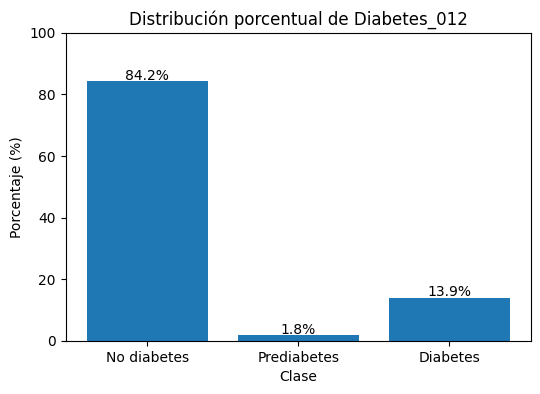

In [7]:
import matplotlib.pyplot as plt

# Conteo y porcentaje
counts = df_multi['Diabetes_012'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Gráfico
plt.figure(figsize=(6,4))
plt.bar(
    ['No diabetes', 'Prediabetes', 'Diabetes'],
    percentages.values
)

plt.title('Distribución porcentual de Diabetes_012')
plt.xlabel('Clase')
plt.ylabel('Porcentaje (%)')

# Etiquetas con porcentaje
for i, v in enumerate(percentages.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.ylim(0, 100)
plt.show()

La variable objetivo Diabetes_012 presenta un fuerte desbalance de clases.
La gran mayoría de los registros corresponde a personas sin diabetes (84,2%), mientras que los casos de diabetes representan el 13,9% y la prediabetes apenas el 1,8% del total.

Este desbalance implica que los modelos de clasificación podrían verse sesgados hacia la clase mayoritaria si no se aplican estrategias adecuadas durante el modelado. En particular, la clase Prediabetes se encuentra subrepresentada, lo que dificulta su correcta identificación y justifica el uso de métricas más robustas que la accuracy, así como técnicas de balanceo o ajustes en el entrenamiento.

Desde el punto de vista del negocio y la salud pública, este comportamiento es relevante, ya que refuerza la importancia de detectar correctamente los casos minoritarios, especialmente aquellos en riesgo de desarrollar diabetes.

### **Análisis univariado de variables cuantitativas**

(Numéricas continuas o discretas)

1. BMI
2. MentHlth
3. PhysHlth
4. Age
5. GenHlth
6. Education
7. Income

In [8]:
df_multi[
    ['BMI','MentHlth','PhysHlth','Age','GenHlth','Education','Income']
].describe()

,BMI,MentHlth,PhysHlth,Age,GenHlth,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081,8.032119,2.511392,5.050434,6.053875
std,6.608694,7.412847,8.717951,3.054220,1.068477,0.985774,2.071148
min,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,6.000000,2.000000,4.000000,5.000000
50%,27.000000,0.000000,0.000000,8.000000,2.000000,5.000000,7.000000
75%,31.000000,2.000000,3.000000,10.000000,3.000000,6.000000,8.000000
max,98.000000,30.000000,30.000000,13.000000,5.000000,6.000000,8.000000


Genera un gráfico univariado con histograma y boxplot para una variable numérica.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_univariate_distribution(df, variable, bins=30, figsize=(10, 4)):
    """
    Genera un gráfico univariado con histograma y boxplot para una variable numérica.

    Parámetros:
    - df: DataFrame
    - variable: nombre de la columna a analizar (str)
    - bins: cantidad de bins del histograma
    - figsize: tamaño de la figura
    """

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Histograma
    axes[0].hist(df[variable], bins=bins)
    axes[0].set_title(f'Distribución de {variable}')
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(y=df[variable], ax=axes[1])
    axes[1].set_title(f'Boxplot de {variable}')
    axes[1].set_ylabel(variable)

    plt.tight_layout()
    plt.show()

#### **BMI (Índice de Masa Corporal)**

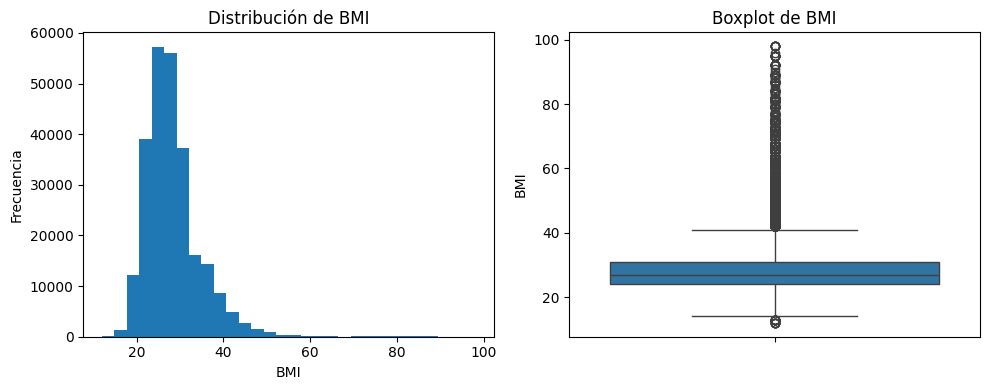

In [10]:
plot_univariate_distribution(df_multi, 'BMI')

La distribución del Índice de Masa Corporal (BMI) presenta una asimetría positiva (sesgo a la derecha). La mayor concentración de individuos se encuentra entre valores aproximados de 20 y 30, lo cual corresponde a rangos de peso normal y sobrepeso leve.

Se observa una cola larga hacia valores altos de BMI, con presencia de registros extremos que superan valores de 50 e incluso alcanzan valores cercanos a 100. Estos valores extremos pueden corresponder a casos de obesidad severa o a posibles errores de registro, por lo que deben ser analizados con mayor detalle en etapas posteriores del proceso.

La relación BMI (masa corporal) vs Edad

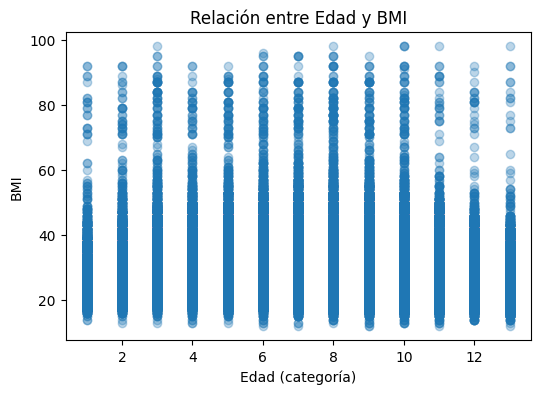

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df_multi['Age'], df_multi['BMI'], alpha=0.3)
plt.xlabel('Edad (categoría)')
plt.ylabel('BMI')
plt.title('Relación entre Edad y BMI')
plt.show()

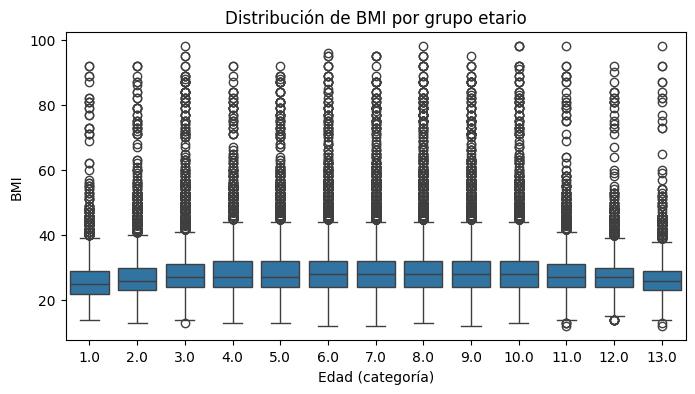

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x='Age', y='BMI', data=df_multi)
plt.xlabel('Edad (categoría)')
plt.ylabel('BMI')
plt.title('Distribución de BMI por grupo etario')
plt.show()

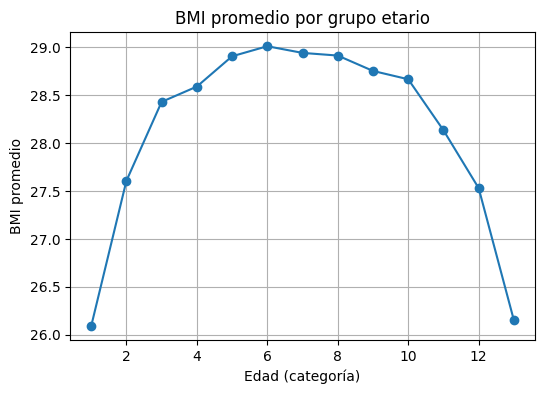

In [13]:
bmi_por_edad = df_multi.groupby('Age')['BMI'].mean()

plt.figure(figsize=(6,4))
bmi_por_edad.plot(marker='o')
plt.xlabel('Edad (categoría)')
plt.ylabel('BMI promedio')
plt.title('BMI promedio por grupo etario')
plt.grid(True)
plt.show()

In [14]:
df_multi[['Age','BMI']].corr()

,Age,BMI
Age,1.000000,-0.036618
BMI,-0.036618,1.000000


La correlación lineal entre edad y BMI es cercana a cero, lo cual es consistente con el carácter ordinal de la variable edad y con una relación no lineal entre ambas variables. Sin embargo, el análisis por grupos etarios muestra variaciones sistemáticas del BMI según la edad, lo que evidencia una relación que no es capturada por la correlación de Pearson.


<Axes: xlabel='Age', ylabel='BMI'>

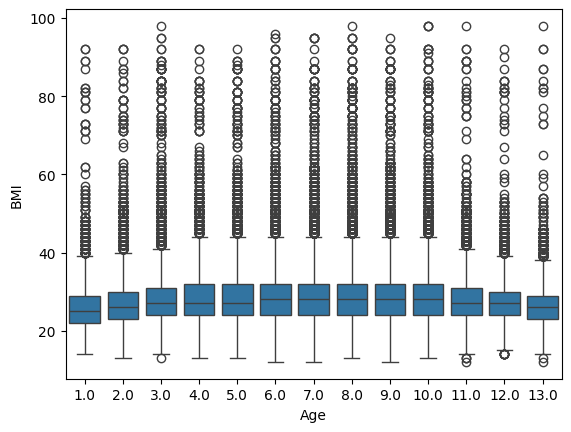

In [15]:
sns.boxplot(x='Age', y='BMI', data=df_multi)

In [16]:
df_multi[['Age','BMI']].corr(method='spearman')

,Age,BMI
Age,1.000000,-0.024591
BMI,-0.024591,1.000000


#### **MentHlth (Salud Mental)**

MentHlth (Salud Mental)
La variable MentHlth representa la cantidad de días, durante los últimos 30 días, en los que la persona reportó no haber tenido una buena salud mental. Esto incluye situaciones como estrés, depresión o problemas emocionales, y toma valores enteros entre 0 y 30.

In [19]:
df_multi['MentHlth'].describe()

,MentHlth
count,253680.000000
mean,3.184772
std,7.412847
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,30.000000


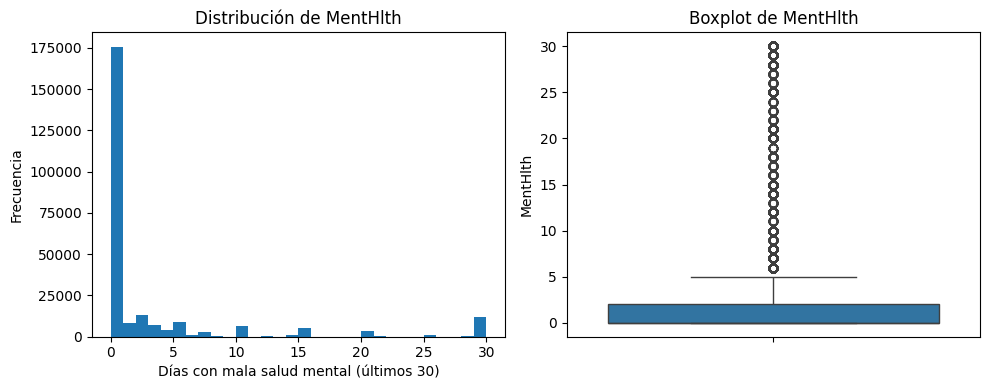

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'MentHlth'

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Histograma
axes[0].hist(df_multi[variable], bins=30)
axes[0].set_title('Distribución de MentHlth')
axes[0].set_xlabel('Días con mala salud mental (últimos 30)')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(y=df_multi[variable], ax=axes[1])
axes[1].set_title('Boxplot de MentHlth')
axes[1].set_ylabel(variable)

plt.tight_layout()
plt.show()

La variable MentHlth presenta una distribución altamente asimétrica, con predominio de valores bajos y una cola extensa hacia valores altos. Aunque la mayoría de los individuos reporta pocos o ningún día de mala salud mental, existe un subconjunto relevante de la población con una carga significativa de problemas de salud mental. Dado su carácter clínicamente válido y su potencial relación con la diabetes, esta variable se conserva íntegramente para el análisis y el modelado.

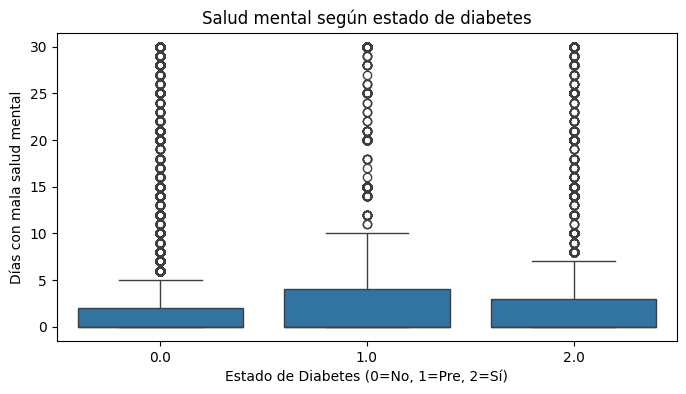

In [21]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Diabetes_012', y='MentHlth', data=df_multi)
plt.title('Salud mental según estado de diabetes')
plt.xlabel('Estado de Diabetes (0=No, 1=Pre, 2=Sí)')
plt.ylabel('Días con mala salud mental')
plt.show()

El análisis exploratorio no evidencia una relación fuerte entre el estado de diabetes y la cantidad de días con mala salud mental.
Si bien el grupo con prediabetes presenta una ligera mayor dispersión, las distribuciones son similares entre los tres grupos, con medianas bajas y presencia de outliers en todos los casos.

### **Análisis univariado de variables cualitativas / categóricas**

(binarias u ordinales)

1. HighBP
2. HighChol
3. CholCheck
4. Smoker
5. Stroke
6. HeartDiseaseorAttack
7. PhysActivity
8. Fruits
9. Veggies
10. HvyAlcoholConsump
11. AnyHealthcare
12. NoDocbcCost
13. DiffWalk
14. Sex

####